<a href="https://colab.research.google.com/github/HussainAhmed75/NTI-AI-and-ML-exercises-/blob/main/Data_preprocessing_med_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df['gender_numeric'] = df['gender'].map({'Male': 0, 'Female': 1}).fillna(-1).astype(int)
df = df.drop(columns=['gender'])

In [ ]:
df

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_numeric
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0
1,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,1
5106,44873,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1
5107,19723,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,1
5108,37544,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  gender_numeric     5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB


In [ ]:
df['ever_married']

,ever_married
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
5105,Yes
5106,Yes
5107,Yes
5108,Yes


In [ ]:
df['eever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0}).fillna(-1).astype(int)
df = df.drop(columns=['ever_married'])

In [ ]:
df

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_numeric,eever_married
0,9046,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,0,1
1,51676,61.0,0,0,Self-employed,Rural,202.21,NaN,never smoked,1,1,1
2,31112,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,0,1
3,60182,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,1,1
4,1665,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Private,Urban,83.75,NaN,never smoked,0,1,1
5106,44873,81.0,0,0,Self-employed,Urban,125.20,40.0,never smoked,0,1,1
5107,19723,35.0,0,0,Self-employed,Rural,82.99,30.6,never smoked,0,1,1
5108,37544,51.0,0,0,Private,Rural,166.29,25.6,formerly smoked,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
 10  gender_numeric     5110 non-null   int64  
 11  eever_married      5110 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 479.2+ KB


In [ ]:
df['work_type'].head()

,work_type
0,Private
1,Self-employed
2,Private
3,Private
4,Self-employed


In [ ]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['work_type'], prefix='work_type')

In [ ]:
df

,id,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_numeric,eever_married,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,67.0,0,1,Urban,228.69,36.6,formerly smoked,1,0,1,False,False,True,False,False
1,51676,61.0,0,0,Rural,202.21,NaN,never smoked,1,1,1,False,False,False,True,False
2,31112,80.0,0,1,Rural,105.92,32.5,never smoked,1,0,1,False,False,True,False,False
3,60182,49.0,0,0,Urban,171.23,34.4,smokes,1,1,1,False,False,True,False,False
4,1665,79.0,1,0,Rural,174.12,24.0,never smoked,1,1,1,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Urban,83.75,NaN,never smoked,0,1,1,False,False,True,False,False
5106,44873,81.0,0,0,Urban,125.20,40.0,never smoked,0,1,1,False,False,False,True,False
5107,19723,35.0,0,0,Rural,82.99,30.6,never smoked,0,1,1,False,False,False,True,False
5108,37544,51.0,0,0,Rural,166.29,25.6,formerly smoked,0,0,1,False,False,True,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5110 non-null   int64  
 1   age                      5110 non-null   float64
 2   hypertension             5110 non-null   int64  
 3   heart_disease            5110 non-null   int64  
 4   Residence_type           5110 non-null   object 
 5   avg_glucose_level        5110 non-null   float64
 6   bmi                      4909 non-null   float64
 7   smoking_status           5110 non-null   object 
 8   stroke                   5110 non-null   int64  
 9   gender_numeric           5110 non-null   int64  
 10  eever_married            5110 non-null   int64  
 11  work_type_Govt_job       5110 non-null   bool   
 12  work_type_Never_worked   5110 non-null   bool   
 13  work_type_Private        5110 non-null   bool   
 14  work_type_Self-employed 

In [ ]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['Residence_type'], prefix='Residence_type')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5110 non-null   int64  
 1   age                      5110 non-null   float64
 2   hypertension             5110 non-null   int64  
 3   heart_disease            5110 non-null   int64  
 4   avg_glucose_level        5110 non-null   float64
 5   bmi                      4909 non-null   float64
 6   smoking_status           5110 non-null   object 
 7   stroke                   5110 non-null   int64  
 8   gender_numeric           5110 non-null   int64  
 9   eever_married            5110 non-null   int64  
 10  work_type_Govt_job       5110 non-null   bool   
 11  work_type_Never_worked   5110 non-null   bool   
 12  work_type_Private        5110 non-null   bool   
 13  work_type_Self-employed  5110 non-null   bool   
 14  work_type_children      

In [ ]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['smoking_status'], prefix='smoking_status')

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
bmi,201
id,0
hypertension,0
age,0
heart_disease,0
avg_glucose_level,0
stroke,0
gender_numeric,0
eever_married,0
work_type_Govt_job,0


In [ ]:
df['bmi']

,bmi
0,36.6
1,NaN
2,32.5
3,34.4
4,24.0
...,...
5105,NaN
5106,40.0
5107,30.6
5108,25.6


In [ ]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy='median') #'median', 'mean', 'constant', 'most_frequent'

# Fit the imputer on both 'Size' and 'Rent' columns at once
imputer.fit(df[['Size', 'Rent','Bathroom']])

# Transform both columns using the fitted imputer
df[['Size', 'Rent','Bathroom']] = imputer.transform(df[['Size', 'Rent','Bathroom']])

(array([ 411., 1964., 1809.,  575.,  105.,   37.,    4.,    2.,    0.,
           2.]),
 array([10.3 , 19.03, 27.76, 36.49, 45.22, 53.95, 62.68, 71.41, 80.14,
        88.87, 97.6 ]),
 <BarContainer object of 10 artists>)

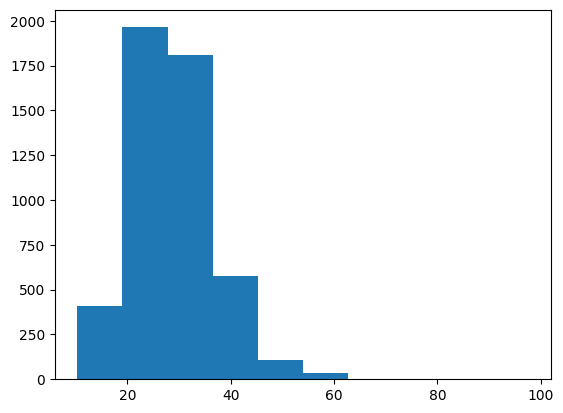

In [ ]:
df['bmi'].skew()
plt.hist(df['bmi'])

In [ ]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy='median') #'median', 'mean', 'constant', 'most_frequent'

# Fit the imputer on both 'Size' and 'Rent' columns at once
imputer.fit(df[['bmi']])

# Transform both columns using the fitted imputer
df[['bmi']] = imputer.transform(df[['bmi']])

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
X = df.drop(columns=['stroke'])
y = df['stroke']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
outliers = {}
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers[col] = df[(df[col] < lower) | (df[col] > upper)][col]

# Show number of outliers in each column
for col in numeric_cols:
    print(col, "→", len(outliers[col]), "outliers")

id → 0 outliers
age → 0 outliers
hypertension → 498 outliers
heart_disease → 276 outliers
avg_glucose_level → 627 outliers
bmi → 126 outliers
stroke → 249 outliers
gender_numeric → 0 outliers
eever_married → 0 outliers
